<a href="https://colab.research.google.com/github/EnricoCeci/Master-Data-Science---Profession-AI---Portfolio-/blob/main/2.%20Programmazione%20con%20Python/33_PyPI_%26_PIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esercizi con PIP

Editor di immagini

Per questo esercizio dovrai creare un semplice editor di immagini, andando a scegliere i moduli da utilizzare dal Python Package Index e studiando la loro documentazione. Per la ricerca non ti basare solo su PyPi, Google, StackOverflow e Github sono anche tuoi amici.

Il programma dovrà chiedere all'utente il percorso ad un'immagine jpg o png, prima di andare avanti il programma deve assicurarsi che l'immagine effettivamente esista (suggerimento, dai uno sguardo al modulo path di os) e che abbia una delle due estensioni accettate, altrimenti deve mostrare un avviso ed uscire.

In seguito, dovrà stampare su schermo:

- Nome dell'immagine (solo il nome senza il percorso).
- Estensione dell'immagine (jpg o png).
- Risoluzione dell'immagine (larghezza x altezza).

Fatto ciò, il programma deve chiedere all'utente se vuole cambiare la risoluzione dell'immagine, l'utente dovrà inserire una risoluzione in formato LARGHEZZAxALTEZZA oppure lasciare vuoto, se lascia vuoto la risoluzione non verrà modificata. Se le proporzioni della nuova risoluzione sono differenti da quelle originali, allora il programma dovrà chiedere all'utente se vuole mantenerle, in caso positivo bisogna modificare larghezza/altezza inserita dall'utente per mantenere le proporzioni originali.

In seguito il programma dovrà chiedere all'utente se vuole convertire l'immagine in bianco e nero, in caso positivo, dovrà farlo.

Il programma dovrà salvare la nuova immagine nella stessa directory dove si trova l'immagine originale, con il nome NOME_IMMAGINE_ORIGINALE_new.ESTENSIONE.

Infine, il programma dovrà mostrare la nuova immagine su schermo.

Di seguito un esempio di utilizzo del programma.

Inserisci il percorso all'immagine: pictures/cat.png

 File: cat.png

 Formato: png

 Risoluzione: 512x512

 Nuova risoluzione: 50x75

 Mantenere le proporzioni? [si/no]: si

 Nuova risoluzione 50x50

 Convertire in bianco e nero? [si/no]: si

 Nuova immagine salvata in pictures//cat_new.png

BONUS
Se usi Jupyter Notebook/Google Colab, prova a mostrare l'immagine finale dentro il tuo notebook.

Saving simpson.png to simpson (4).png
Inserisci il percorso al file: /content/simpson.png
Nome immagine: simpson
Estensione: .png
Risoluzione: 1536 x 1024
Se vuoi cambiare risoluzione inserisci le nuove dimensioni seguendo lo schema LARGHEZZAxALTEZZA (es. 800x600): 800600
Formato non valido! Devi usare il formato LARGHEZZAxALTEZZA (es. 800x600): 
Inserisci le nuove dimensioni seguendo lo schema LARGHEZZAxALTEZZA (es. 800x600): 800700
Formato non valido! Devi usare il formato LARGHEZZAxALTEZZA (es. 800x600): 
Inserisci le nuove dimensioni seguendo lo schema LARGHEZZAxALTEZZA (es. 800x600): 800x600
Le dimensioni da te inserite hanno una risoluzione diversa dall'originale. Vuoi mantenerle? Rispondi si o no: si
Vuoi convertire la tua immagine in bianco e nero? Rispondi si o no: no


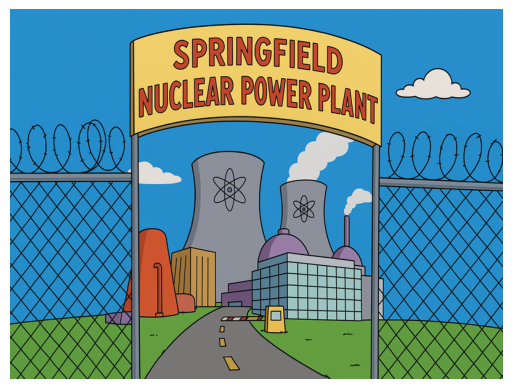

In [6]:
from google.colab import files
uploaded = files.upload()

import sys
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt

#richiesta percorso immagine all'utente
file_path = input("Inserisci il percorso al file: ")

#verifica esistenza immagine ed estrazione estensione
if not os.path.exists(file_path):
  print("Il file non esiste, il programma verrà chiuso")
  sys.exit()

name = os.path.splitext(os.path.basename(file_path))[0]
extension = os.path.splitext(file_path)[1].lower()

#verifica natura estensione
if extension not in (".jpg", ".png"):
  print("Il formato non è corretto, il programma verrà chiuso")
  sys.exit()

#apertura dell’immagine
with Image.open(file_path) as img:
    width, height = img.size  # restituisce una tupla (larghezza, altezza)

#stampa delle informazioni
print(f"Nome immagine: {name}")
print(f"Estensione: {extension}")
print(f"Risoluzione: {width} x {height}")

#richiesta inserimento nuove dimensioni
new_w_h = input("Se vuoi cambiare risoluzione inserisci le nuove dimensioni seguendo lo schema LARGHEZZAxALTEZZA (es. 800x600): ")

#spacchetto l'altezza e la larghezza inserite

if new_w_h == "":
  print("Nessuna nuova risoluzione inserita — mantengo l'originale.")
  new_width, new_height = width, height

else:
  while True:
    try:
      new_width, new_height = map(int, new_w_h.split("x"))
      break #esce dal ciclo se va bene
    except ValueError:
        print("Formato non valido! Devi usare il formato LARGHEZZAxALTEZZA (es. 800x600): ")
        new_w_h = input("Inserisci le nuove dimensioni seguendo lo schema LARGHEZZAxALTEZZA (es. 800x600): ")

#verifica proporzioni inserite
if width/height != new_width/new_height:
    maintain=input("Le dimensioni da te inserite hanno una risoluzione diversa dall'originale. Vuoi mantenerle? Rispondi si o no: ").lower()
    while maintain not in ("si", "no"):
        maintain = input("Risposta non valida. Scrivi solo 'si' o 'no': ").lower()

    if maintain == "no":
      # l'utente deve reinserire le dimensioni corrette
      while True:
          new_w_h = input(
              f"Inserisci delle dimensioni che producano un rapporto pari a {width/height:.2f}, "
              "rispettando il formato LARGHEZZAxALTEZZA (es. 800x600): "
          )
          try:
              new_width, new_height = map(int, new_w_h.split("x"))
              break  # esce dal ciclo se va bene
          except ValueError:
              print("Formato non valido! Riprova.")


      else:
          # Mantieni le proporzioni correggendo l’altezza
          new_height = int(new_width / (width / height))
          print(f"Per mantenere le proporzioni, la nuova altezza è stata adattata a {new_height}.")


#richiesta di convertire in bianco e nero
convert=input("Vuoi convertire la tua immagine in bianco e nero? Rispondi si o no: ").lower()
while convert not in ("si", "no"):
    convert = input("Risposta non valida. Scrivi solo 'si' o 'no': ").lower()

if convert == "no":
  with Image.open(file_path) as img:
      img = img.resize((new_width, new_height))
      plt.imshow(img)
      plt.axis("off")
      plt.show()

else:
  with Image.open(file_path) as img:
    img = img.resize((new_width, new_height))
    new_image = img.convert("L")

  #Il programma dovrà salvare la nuova immagine nella stessa directory dove si trova l'immagine originale, con il nome NOME_IMMAGINE_ORIGINALE_new.ESTENSIONE.
  directory=os.path.dirname(file_path)
  new_file_path = os.path.join(directory, name + "_new" + extension)
  new_image.save(new_file_path)

#Infine, il programma dovrà mostrare la nuova immagine su schermo.
  plt.imshow(new_image)
  plt.axis("off")
  plt.show()

In [ ]:
new_w_h= input(f"Inserisci delle dimensioni che producano un rapporto pari a {width/height}, sempre rispettando l'impostazione LARGHEZZAxALTEZZA (es. 800x600): ")
      try:
          new_width, new_height = map(int, new_w_h.split("x"))
      except ValueError:
          print("Formato non valido! Devi usare il formato LARGHEZZAxALTEZZA (es. 800x600): ")